In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kidney.csv")

In [77]:
df.head(100)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0,1.0,0.0,0.0,1
7,24.0,42.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0,1.0,1.0,0.0,1
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0,1.0,0.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,75.0,60.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,110.0,...,40.0,8300.0,5.8,0.0,0.0,0,0.0,0.0,0.0,0
296,41.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,125.0,...,41.0,6300.0,5.9,0.0,0.0,0,1.0,0.0,0.0,0
297,53.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,116.0,...,45.0,7700.0,5.2,0.0,0.0,0,1.0,0.0,0.0,0
298,34.0,60.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,91.0,...,48.0,8600.0,4.9,0.0,0.0,0,1.0,0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [7]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


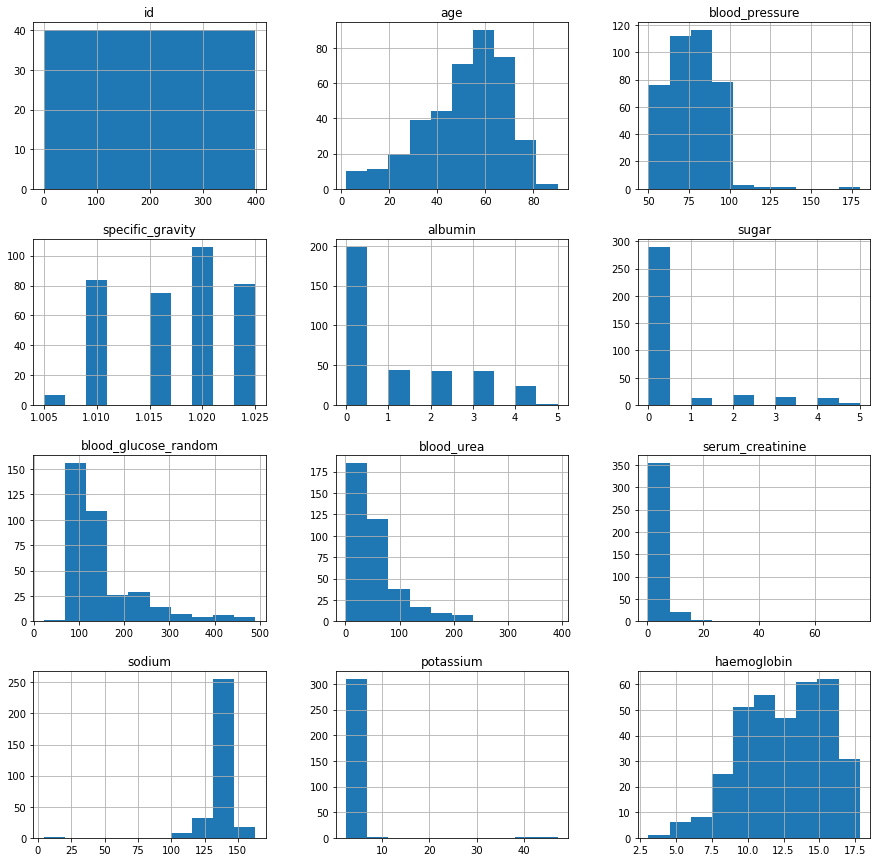

In [8]:
# To fill these NaN values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df.hist(figsize = (15,15))

In [9]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [10]:
df = df.drop('id',axis=1)

In [11]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


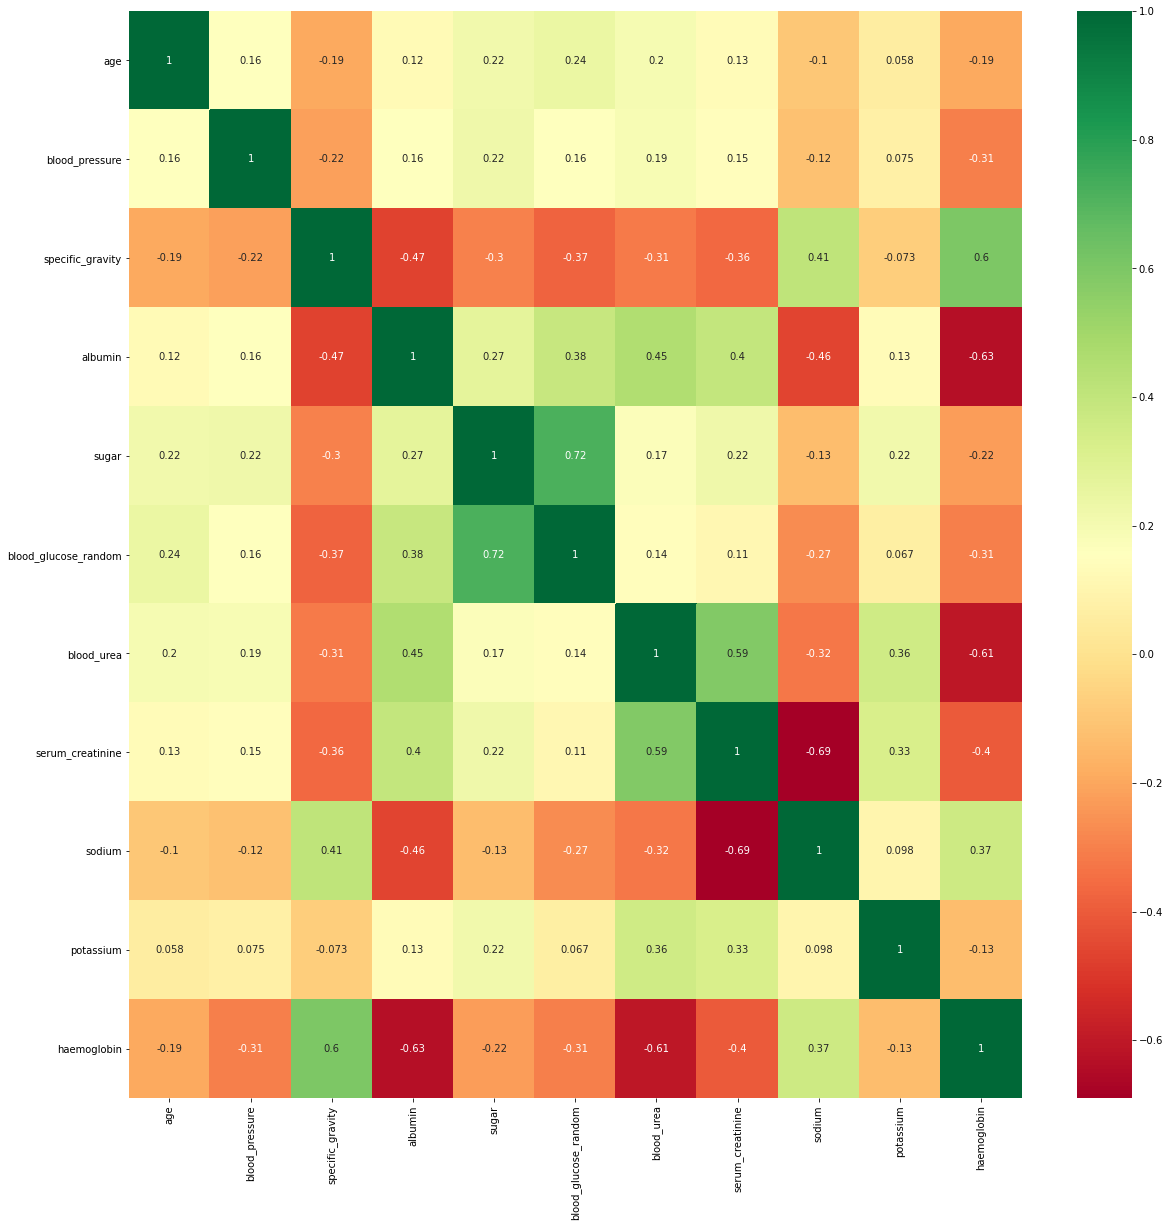

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
df['age'] = df['age'].fillna(df['age'].mean())

In [14]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_urea'].median())

In [15]:
df['specific_gravity'] = df['specific_gravity'].fillna(df['specific_gravity'].median())

In [16]:
df['albumin'] = df['albumin'].fillna(df['albumin'].mode())

In [17]:
df['sugar'] = df['sugar'].fillna(df['sugar'].mode())

In [18]:
df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [20]:
df['diabetes_mellitus'].unique()

array([1, 0, ' yes', '\tno', '\tyes', nan], dtype=object)

In [21]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {' yes':1,'\tno':0,'\tyes':1})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [23]:
df['albumin'] = df['albumin'].fillna(df['albumin'].median())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [25]:
df['sugar'].median()

0.0

In [26]:
df['sugar'] = df['sugar'].fillna(df['sugar'].median())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [28]:
df['sodium'] = df['sodium'].fillna(df['sodium'].median())

In [29]:
df['potassium'] = df['potassium'].fillna(df['potassium'].median())

In [30]:
df['haemoglobin'] = df['haemoglobin'].fillna(df['haemoglobin'].median())

In [31]:
df['serum_creatinine'] = df['serum_creatinine'].fillna(df['serum_creatinine'].median())

In [32]:
df['blood_urea'] = df['blood_urea'].fillna(df['blood_urea'].median())

In [33]:
df['blood_glucose_random'] = df['blood_glucose_random'].fillna(df['blood_glucose_random'].median())

In [34]:
df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].fillna(0)

In [35]:
df['appetite'] = df['appetite'].replace(to_replace={'good':1,'poor':0})

In [36]:
df['appetite'] = df['appetite'].fillna(0)

In [37]:
df[['pus_cell_clumps','bacteria']] = df[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})

In [38]:
df[['pus_cell_clumps','bacteria']] = df[['pus_cell_clumps','bacteria']].fillna(0)

In [39]:
df[['red_blood_cells','pus_cell']] = df[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})

In [40]:
df['coronary_artery_disease']  = df['coronary_artery_disease'].replace(to_replace={'\tno':0})

In [41]:
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0,'ckd\t':1})

In [42]:
df.head(20)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,121.0,...,38,6000,NaN,0.0,0.0,0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0,1.0,0.0,0.0,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39,7800,4.4,1.0,1.0,0,1.0,1.0,0.0,1
6,68.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,100.0,...,36,NaN,NaN,0.0,0.0,0,1.0,0.0,0.0,1
7,24.0,42.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,...,44,6900,5,0.0,1.0,0,1.0,1.0,0.0,1
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,...,33,9600,4.0,1.0,1.0,0,1.0,0.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0,0.0,0.0,1.0,1


In [43]:
df['red_blood_cell_count'] = df['red_blood_cell_count'].replace(to_replace={'\t?':5.0})

In [44]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'])

In [45]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].replace(to_replace={'\t6200':6200,'\t?':9800,'\t8400':8400})

In [46]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'])

In [47]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace(to_replace={'\t43':43,'\t?':52})

In [48]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'])

In [49]:
df['white_blood_cell_count'].value_counts()

9800.0     12
6700.0     10
9200.0      9
9600.0      9
7200.0      9
           ..
18900.0     1
16700.0     1
10900.0     1
5100.0      1
9900.0      1
Name: white_blood_cell_count, Length: 89, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          248 non-null    float64
 6   pus_cell                 335 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [51]:
df = df.dropna(axis=0)

In [52]:
df['classification'].value_counts()

0    133
1     57
Name: classification, dtype: int64

In [53]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [54]:
from imblearn.combine import SMOTEENN

In [55]:
x = df.drop('classification',axis=1)
y = df['classification']

In [56]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,0,1.0,0.0,0.0
7,24.0,42.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,...,12.4,44.0,6900.0,5.0,0.0,1.0,0,1.0,1.0,0.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,...,10.8,33.0,9600.0,4.0,1.0,1.0,0,1.0,0.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,9.5,29.0,12100.0,3.7,1.0,1.0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.9,0.0,0.0,0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.2,0.0,0.0,0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.4,0.0,0.0,0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,14.2,51.0,7200.0,5.9,0.0,0.0,0,1.0,0.0,0.0


In [57]:
y

3      1
4      1
7      1
8      1
9      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 190, dtype: int64

In [58]:
sm = SMOTEENN()
x_resampled , y_resampled = sm.fit_sample(x,y)

In [59]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_resampled,y_resampled,test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model_rf = RandomForestClassifier(n_estimators=100 , criterion='gini', random_state=100, max_depth=7, min_samples_leaf=8)
model_rf.fit(xr_train,yr_train)
y_pred_rf = model_rf.predict(xr_test)

In [62]:
print(classification_report(yr_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        20

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


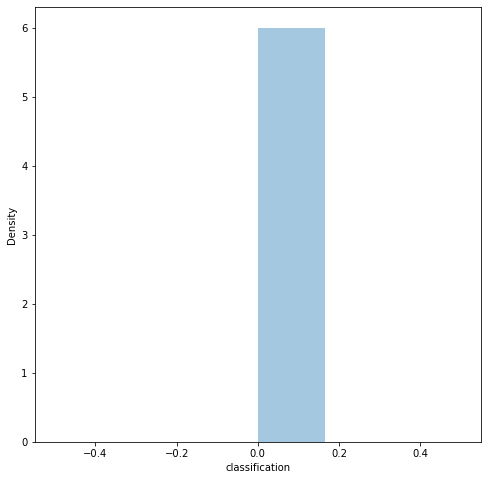

In [63]:
plt.figure(figsize = (8,8))
sns.distplot(yr_test - y_pred_rf)
plt.show()

In [64]:
import pickle
# open a file, where you ant to store the data
file = open('kidney_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_rf, file)

In [79]:
u = model_rf.predict(df.iloc[1:2][:].drop('classification',axis=True))

In [80]:
u

array([1], dtype=int64)

In [82]:
x_resampled.shape

(193, 24)

In [83]:
x.shape

(190, 24)

In [91]:
y.value_counts()

0    133
1     57
Name: classification, dtype: int64

In [92]:
y_resampled.value_counts()

0    98
1    95
Name: classification, dtype: int64

In [90]:
xr_train.shape

(154, 24)